#  Seaborn Tutorial Contents

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [3]:
dataset  = pd.read_csv(r"C:\Users\ganes\Desktop\Data Science\Pokemon.csv")

In [4]:
dataset.head()

,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Stage,Legendary
0,1,Bulbasaur,Grass,Poison,318,45,49,49,65,65,45,1,False
1,2,Ivysaur,Grass,Poison,405,60,62,63,80,80,60,2,False
2,3,Venusaur,Grass,Poison,525,80,82,83,100,100,80,3,False
3,4,Charmander,Fire,NaN,309,39,52,43,60,50,65,1,False
4,5,Charmeleon,Fire,NaN,405,58,64,58,80,65,80,2,False


In [5]:
dataset.tail()

,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Stage,Legendary
146,147,Dratini,Dragon,NaN,300,41,64,45,50,50,50,1,False
147,148,Dragonair,Dragon,NaN,420,61,84,65,70,70,70,2,False
148,149,Dragonite,Dragon,Flying,600,91,134,95,100,100,80,3,False
149,150,Mewtwo,Psychic,NaN,680,106,110,90,154,90,130,1,True
150,151,Mew,Psychic,NaN,600,100,100,100,100,100,100,1,False


In [7]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 151 entries, 0 to 150
Data columns (total 13 columns):
#            151 non-null int64
Name         151 non-null object
Type 1       151 non-null object
Type 2       67 non-null object
Total        151 non-null int64
HP           151 non-null int64
Attack       151 non-null int64
Defense      151 non-null int64
Sp. Atk      151 non-null int64
Sp. Def      151 non-null int64
Speed        151 non-null int64
Stage        151 non-null int64
Legendary    151 non-null bool
dtypes: bool(1), int64(9), object(3)
memory usage: 14.4+ KB


# Seaborn's plotting functions.

One of Seaborn's greatest strengths is its diversity of plotting functions. For instance, making a scatter plot is just one line of code using the lmplot() function.<p>

There are two ways you can do so.

- The first way (recommended) is to pass your DataFrame to the data= argument, while passing column names to the axes arguments, x= and y=.
- The second way is to directly pass in Series of data to the axes arguments.
For example, let's compare the Attack and Defense stats for our Pokémon:

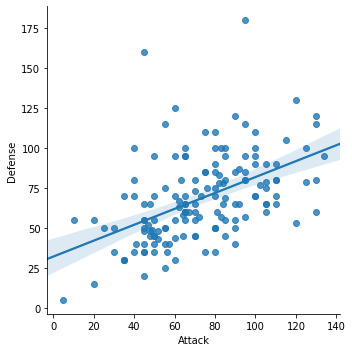

In [8]:
# Let's compare the Attack and Defense stats for our Pokémon
sns.lmplot(x ='Attack',y='Defense',data = dataset)

By the way, Seaborn doesn't have a dedicated scatter plot function, which is why you see a diagonal line. We actually used Seaborn's function for fitting and plotting a regression line.<p>

Thankfully, each plotting function has several useful options that you can set. Here's how we can tweak the lmplot():

First, we'll set fit_reg=False to remove the regression line, since we only want a scatter plot.
Then, we'll set hue='Stage' to color our points by the Pokémon's evolution stage. This hue argument is very useful because it allows you to express a third dimension of information using color.

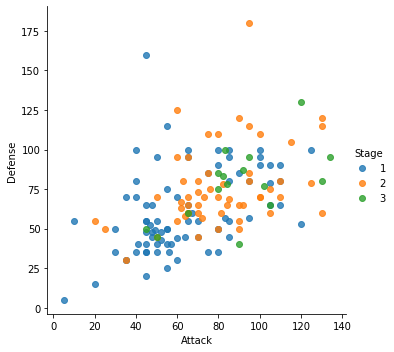

In [9]:
# Scatterplot Arguments
sns.lmplot(x='Attack',y='Defense',data = dataset,fit_reg= False,hue ='Stage')

(0, 141.9881096001028)

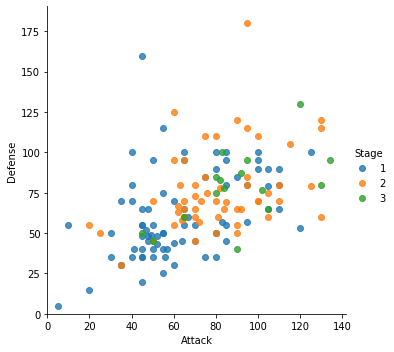

In [11]:
# Customizing with Matplotlib.
# Plot using Seaborn
sns.lmplot(x='Attack', y='Defense', data=dataset,
           fit_reg=False, 
           hue='Stage')
# Tweak using matplotlib
plt.ylim(0,None)
plt.xlim(0,None)

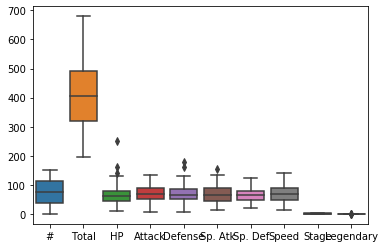

In [12]:
# BOX PLOT
sns.boxplot(data=dataset)

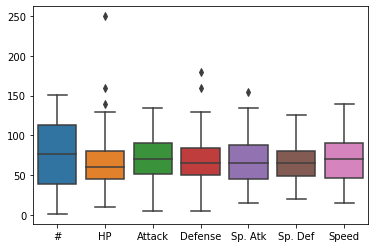

In [13]:
# Pre-format DataFrame
stats_df = dataset.drop(['Total', 'Stage', 'Legendary'], axis=1)
 
# New boxplot using stats_df
sns.boxplot(data=stats_df)

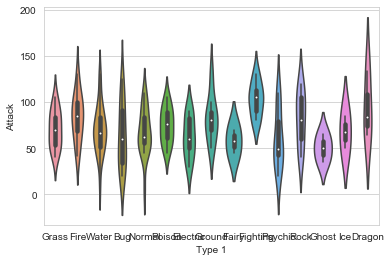

In [14]:
    # Set the Theme,and violin plot
    sns.set_style('whitegrid')
    
    # violin plot 
    sns.violinplot(x='Type 1',y='Attack',data = dataset)

As you can see, Dragon types tend to have higher Attack stats than Ghost types, but they also have greater variance.

In [15]:
# color palettes
pkmn_type_colors = ['#78C850',  # Grass
                    '#F08030',  # Fire
                    '#6890F0',  # Water
                    '#A8B820',  # Bug
                    '#A8A878',  # Normal
                    '#A040A0',  # Poison
                    '#F8D030',  # Electric
                    '#E0C068',  # Ground
                    '#EE99AC',  # Fairy
                    '#C03028',  # Fighting
                    '#F85888',  # Psychic
                    '#B8A038',  # Rock
                    '#705898',  # Ghost
                    '#98D8D8',  # Ice
                    '#7038F8',  # Dragon
                   ]

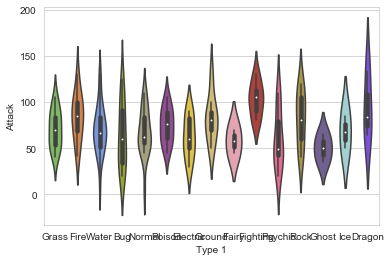

In [17]:
# Violin plot with Pokemon color palette
sns.violinplot(x='Type 1', y='Attack', data=dataset, 
               palette=pkmn_type_colors) # Set color palette

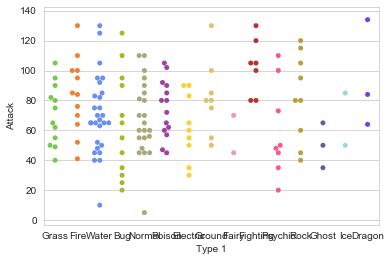

In [18]:
# Swarm plot
sns.swarmplot(x='Type 1',y='Attack',data= dataset,palette=pkmn_type_colors)

Text(0.5, 1.0, 'Attack by type')

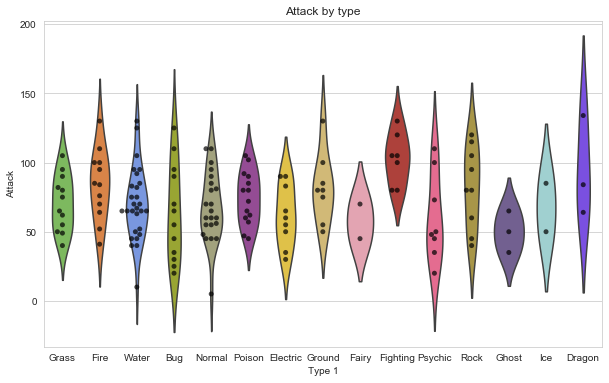

In [20]:
# Overlaying the swarm and violin plot
# set the figure size with matplotlib
plt.figure(figsize=(10,6))

# Create plot
sns.violinplot(x ='Type 1',y='Attack',data= dataset,inner= None,palette=pkmn_type_colors)
sns.swarmplot(x ='Type 1',y='Attack',data= dataset,color='k',alpha = 0.7)
plt.title("Attack by type")

In [21]:
# Melt function of pandas dataframe
# Melt DataFrame
melted_df = pd.melt(stats_df, 
                    id_vars=["Name", "Type 1", "Type 2"], # Variables to keep
                    var_name="Stat") # Name of melted variable
melted_df.head()


,Name,Type 1,Type 2,Stat,value
0,Bulbasaur,Grass,Poison,#,1
1,Ivysaur,Grass,Poison,#,2
2,Venusaur,Grass,Poison,#,3
3,Charmander,Fire,NaN,#,4
4,Charmeleon,Fire,NaN,#,5


In [22]:
print( stats_df.shape )
print( melted_df.shape )
# (151, 9)
# (906, 5)

(151, 10)
(1057, 5)


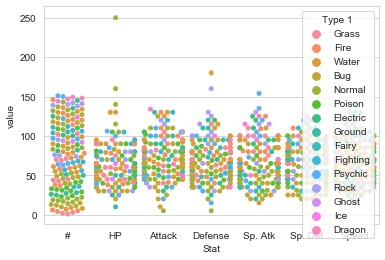

In [23]:

# Swarmplot with melted_df
sns.swarmplot(x='Stat', y='value', data=melted_df, 
              hue='Type 1')

C:\Users\ganes\Anaconda3\lib\site-packages\seaborn\categorical.py:2974: UserWarning: The `split` parameter has been renamed to `dodge`.
  warnings.warn(msg, UserWarning)


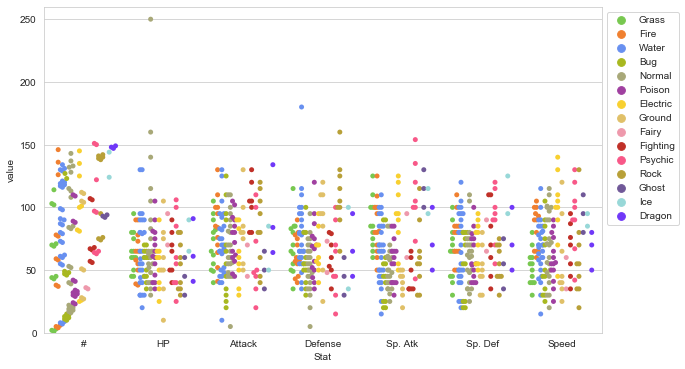

In [24]:
# 1. Enlarge the plot
plt.figure(figsize=(10,6))
 
sns.swarmplot(x='Stat', 
              y='value', 
              data=melted_df, 
              hue='Type 1', 
              split=True, # 2. Separate points by hue
              palette=pkmn_type_colors) # 3. Use Pokemon palette
 
# 4. Adjust the y-axis
plt.ylim(0, 260)
 
# 5. Place legend to the right
plt.legend(bbox_to_anchor=(1, 1), loc=2)

# Heatmap

Heatmaps help you visualize matrix-like data.



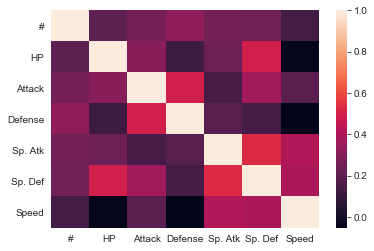

In [25]:
corr = stats_df.corr()

# Heatmap
sns.heatmap(corr)

# Histograms 

Histograms allow you to plot the distributions of numeric variables.

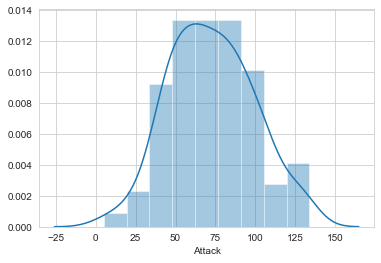

In [27]:

# Distribution Plot (a.k.a. Histogram)
sns.distplot(dataset.Attack)

# Bar plot

Bar plots help you visualize the distributions of categorical variables.



(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14]),
 <a list of 15 Text xticklabel objects>)

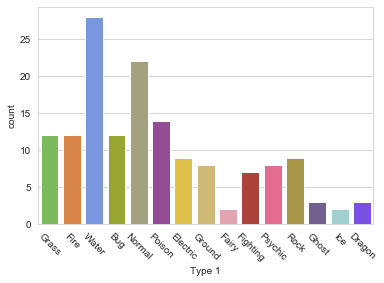

In [28]:
sns.countplot(x='Type 1',data= dataset,palette=pkmn_type_colors)

# Rotate x-labels
plt.xticks(rotation = -45)

# Factor PLot

Factor plots make it easy to separate plots by categorical classes.



C:\Users\ganes\Anaconda3\lib\site-packages\seaborn\categorical.py:3666: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


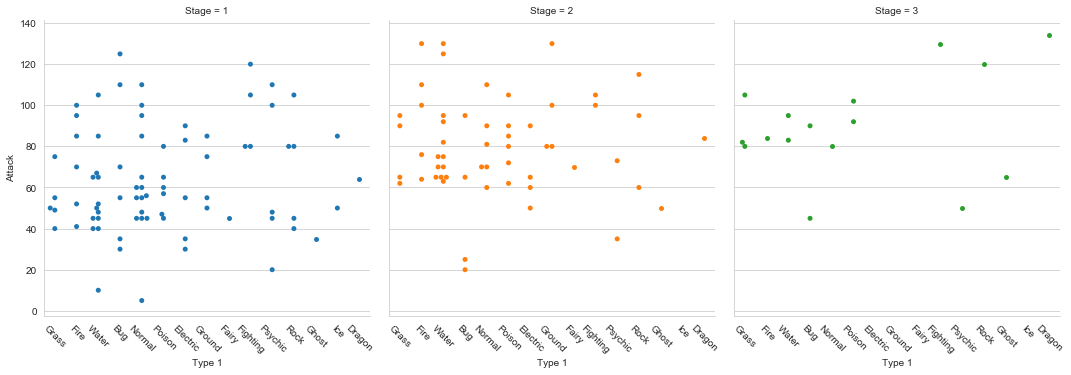

In [30]:
# Factor plot
g = sns.factorplot(x='Type 1',
                  y='Attack',
                  data= dataset,
                  hue='Stage',
                  col='Stage',
                  kind='swarm')

# Rotate x-axis labels
g.set_xticklabels(rotation=-45)

# Density plot

Density plots display the distribution between two variables.



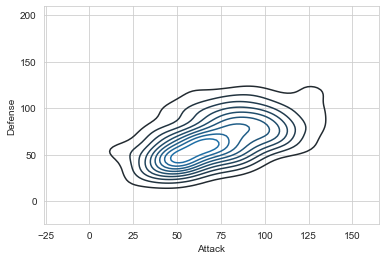

In [31]:
# Density plot
sns.kdeplot(dataset.Attack,dataset.Defense)

# Joint distribution plots

Joint distribution plots combine information from scatter plots and histograms to give you detailed information for bi-variate distributions.



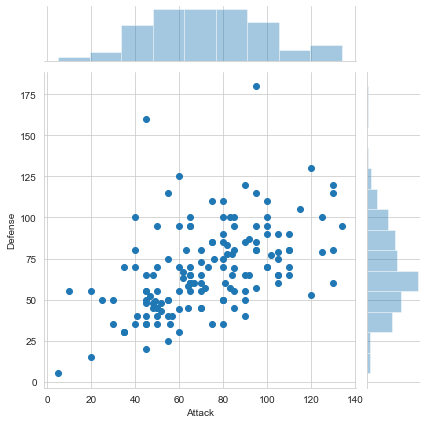

In [32]:
sns.jointplot(x='Attack',y='Defense',data= dataset)